# PARKINSON'S DISEASE PREDICTION

This is a classification type of problem in which we are going to predict if a patient is suffering from Parkinson's disease based on the audio/ voice measures.

In [1]:
# Loading the dependencis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('parkinsons.data.txt')

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.shape

(195, 24)

In [5]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no null values in the dataframe.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
# The Status column is the target column.
data.status

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

The values implies Health status of the subject (1) - Parkinson's, (0) - healthy

# VISUALIZATION

[]

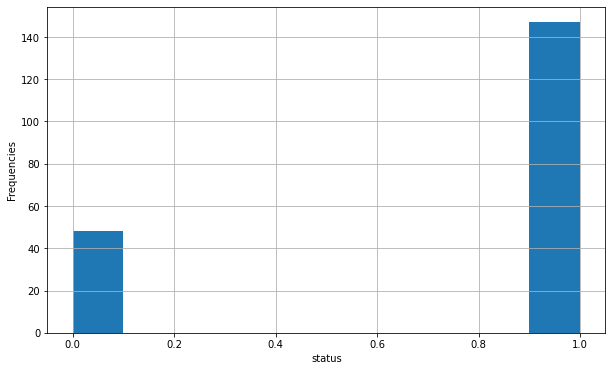

In [10]:
plt.figure(figsize=(10, 6))
data.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()
# The dataset has high number of patients effected with Parkinson's disease.

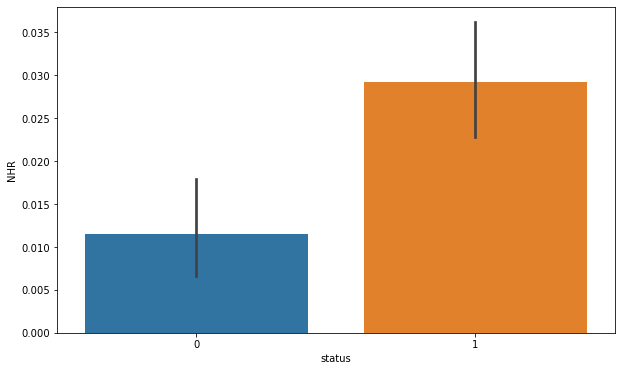

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=data);

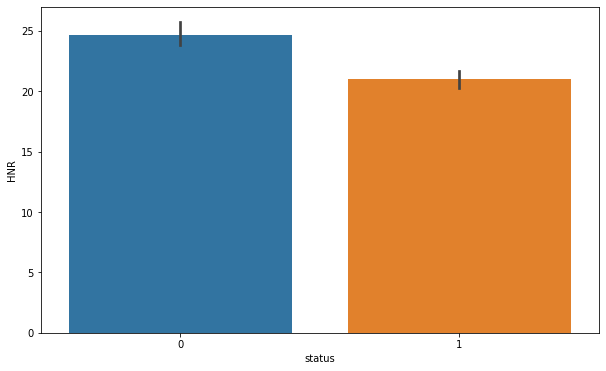

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=data);

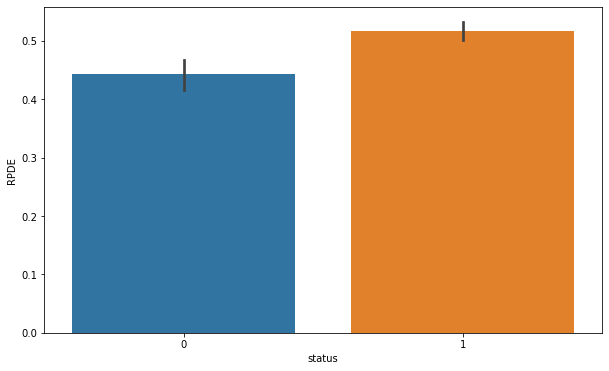

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=data);

In [14]:
# Removing  name column as it is not having much importance.
data.drop(['name'],axis=1,inplace=True)

# Distribution plot

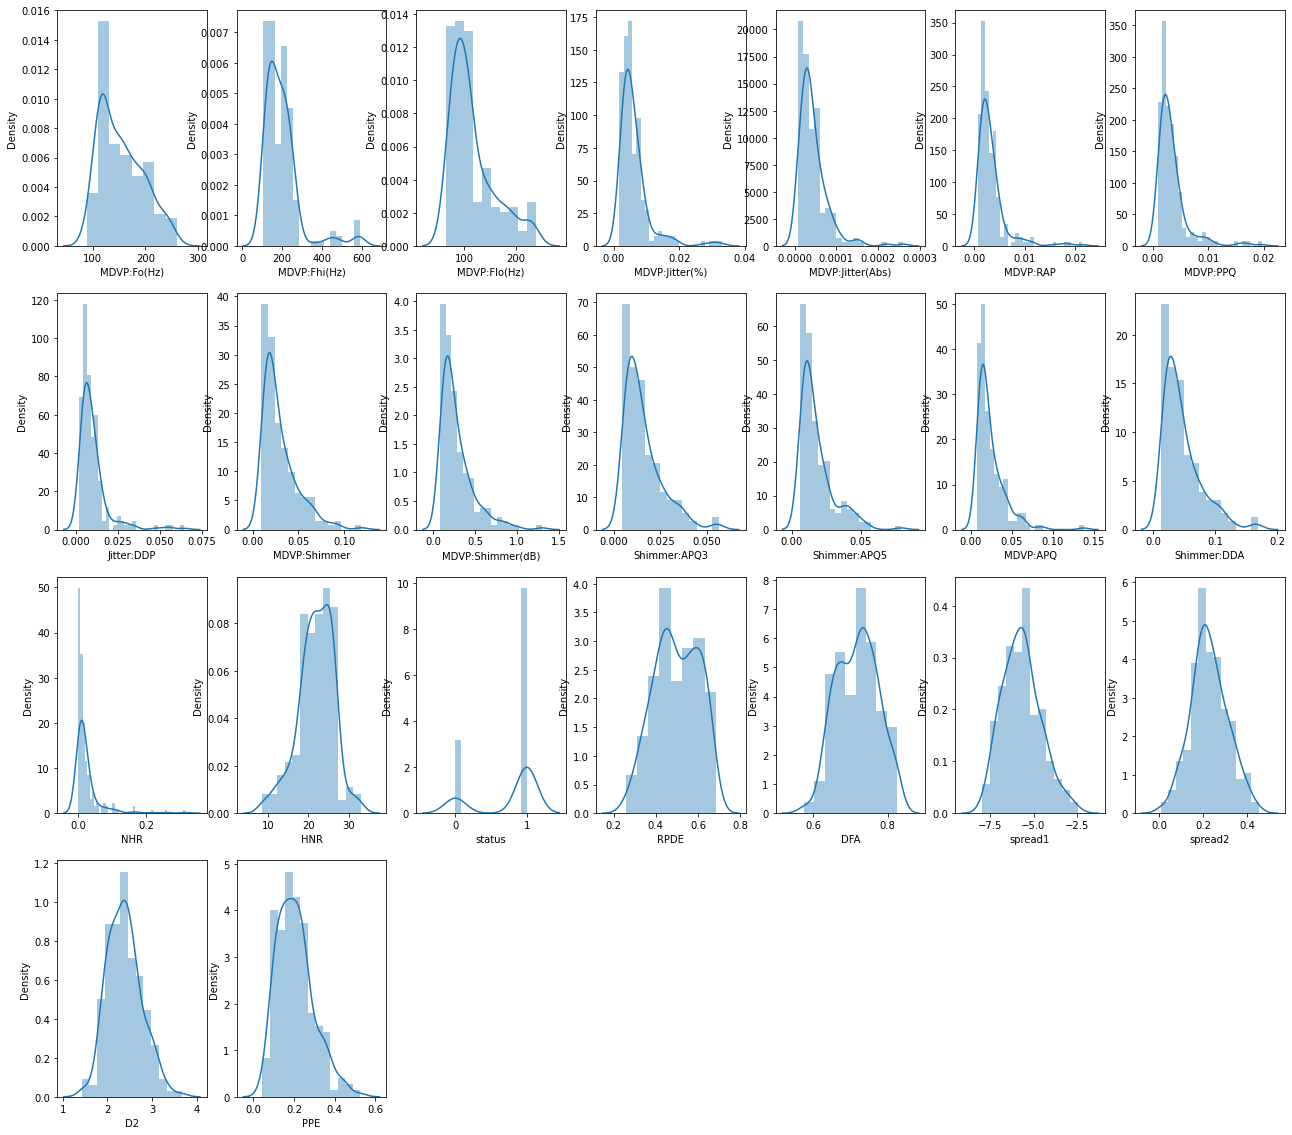

In [15]:
plt.figure(figsize=(22,20),facecolor='white')
plotnumber=1
for column in data.columns:
    plt.subplot(4,7,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [16]:
# Lets rearrange the columns:

In [17]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [18]:
# Lets rearrange the columns for convenience
data = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',  'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE','status']]

In [19]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [20]:
x = data.iloc[:, :-1].values
x.shape

(195, 22)

In [21]:
y = data.iloc[:, -1].values
y.shape

(195,)

In [22]:
sc = StandardScaler()

In [23]:
x = sc.fit_transform(x)

# Splitting the data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train.shape

(156, 22)

In [26]:
x_test.shape

(39, 22)

In [27]:
y_train.shape

(156,)

In [28]:
y_test.shape

(39,)

In [29]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "SVC" : SVC()
}

In [30]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("*"*60)

model trained with LogisticRegression
Model accuracy on train is::  0.8782051282051282
Model accuracy on test is::  0.7948717948717948
confusion_matrix train is::  [[ 25  13]
 [  6 112]]
confusion_matrix test is::  [[ 7  3]
 [ 5 24]]
************************************************************
model trained with DecisionTreeClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8717948717948718
confusion_matrix train is::  [[ 38   0]
 [  0 118]]
confusion_matrix test is::  [[ 8  2]
 [ 3 26]]
************************************************************
model trained with RandomForestClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.9230769230769231
confusion_matrix train is::  [[ 38   0]
 [  0 118]]
confusion_matrix test is::  [[ 9  1]
 [ 2 27]]
************************************************************
model trained with KNeighborsClassifier
Model accuracy on train is::  0.9358974358974359
Model accuracy on test is::  0.9487179487179487


By looking at the metrics we can see that KNeighborsClassifier has the best perfomance overall.

# HYPER PARAMETER TUNING WITH GRIDSEARCHCV

We will use three hyperparamters- n-neighbors, weights and metric.

n_neighbors: Decide the best k based on the values we have computed earlier. weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points. metric: The distance metric to be used will calculating the similarity.

In [31]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [32]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [33]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [34]:
# find the best score
g_res.best_score_

0.923076923076923

In [35]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [36]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=7,
                     weights='distance')

In [37]:
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0], dtype=int64)

In [38]:
y_pred_knn_test = knn.predict(x_test)
y_pred_knn_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_pred_knn_train))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_knn_test))

Training set accuracy:  1.0
Test set accuracy:  0.8974358974358975


In [40]:
print(confusion_matrix(y_test, y_pred_knn_test))

[[ 9  1]
 [ 3 26]]


In [41]:
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



In [42]:
scores = cross_val_score(knn, x, y, cv =5)

In [43]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.7948717948717949


As we see, we have obtained a very good model accuracy of 0.79. It is possible that the accuracy may be increased further by using more hyperparameters or with a different model.

In [44]:
## Saving the actual and predicted values to a dataframe
PREDICTIONS=pd.DataFrame(zip(y_pred_knn_test,y_test), columns=[ "predicted_state","Actual_state"])

In [45]:
PREDICTIONS.replace({1:"Patient", 0:"Healthy"}, inplace=True)

In [46]:
PREDICTIONS.shape

(39, 2)

In [47]:
PREDICTIONS.head(39)

,predicted_state,Actual_state
0,Healthy,Patient
1,Patient,Patient
2,Healthy,Healthy
3,Patient,Patient
4,Patient,Healthy
5,Patient,Patient
6,Healthy,Patient
7,Patient,Patient
8,Patient,Patient
9,Patient,Patient
